# IMPORT REQUIRED LIBRARIES

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
hyundai=pd.read_csv(r"C:\Users\jafar\Downloads\car_age_price.csv")
hyundai

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [34]:
hyundai.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [35]:
hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [36]:
hyundai.isnull().sum()

Year     0
Price    0
dtype: int64

In [37]:
hyundai.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [38]:
hyundai.shape

(112, 2)

In [39]:
hyundai[hyundai.duplicated(keep='first')]

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


# GROUPING

In [40]:
aggregated_data = hyundai.groupby('Year')['Price'].mean().reset_index()
aggregated_data

,Year,Price
0,2013,333750.000000
1,2014,380166.666667
2,2015,390454.454545
3,2016,419333.333333
4,2017,523106.361702
5,2018,497272.727273
6,2019,577500.000000
7,2020,621250.000000


# OUTLIER ANALYSIS

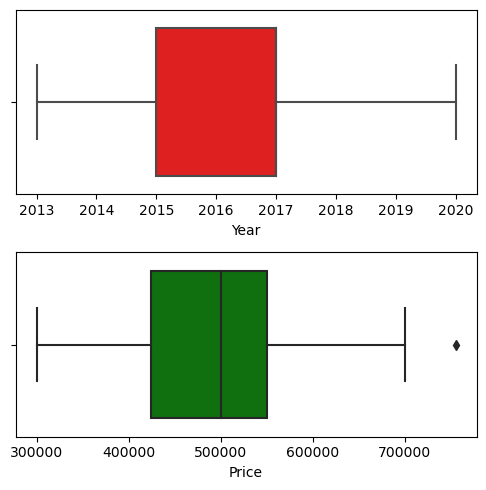

In [41]:
fig,axs=plt.subplots(2,figsize=(5,5))
plt1=sns.boxplot(x=hyundai['Year'],ax=axs[0],color='r')
plt2=sns.boxplot(x=hyundai['Price'],ax=axs[1],color='g')
plt.tight_layout()


# MODEL BUILDING

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [43]:
X=aggregated_data[['Year']]
y=aggregated_data['Price']

# FIT THE LINEAR MODEL

In [44]:
model=LinearRegression()

In [45]:
model.fit(X,y)

LinearRegression()

In [46]:
from ipywidgets.widgets.interaction import interactive_output


In [47]:
predictions=model.predict(X)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mse = mean_squared_error(y, predictions)
mse

466132094.1418216

# print model coefficients

In [50]:
linear_coefficients = model.coef_
linear_coefficients

array([40754.69658592])

In [51]:
print(model.intercept_,model.coef_)


-81713991.47256762 [40754.69658592]


# PREDICT PRICE IN YEAR 2022

In [52]:
year_to_predict=2023

In [53]:
predicted_price=model.predict(np.array([[year_to_predict]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
print(f"Predicted price for {year_to_predict}: {predicted_price[0]:.2f}")

Predicted price for 2023: 732759.72


# REGRESSION LINE

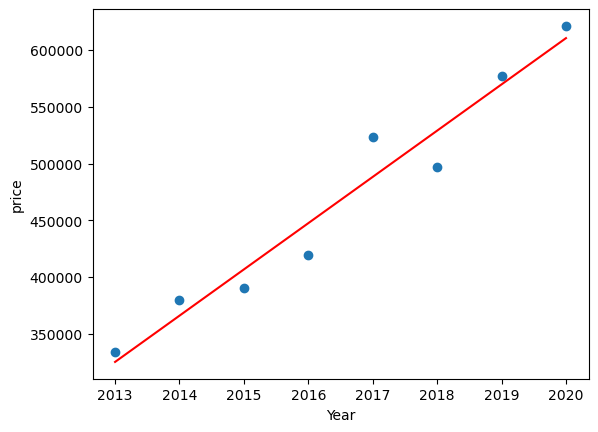

In [55]:
plt.scatter(X,y,label='Data points')
plt.plot(X,model.predict(X), color='red', label= 'Regression Line')
plt.xlabel('Year')
plt.ylabel('price')
plt.show()

In [56]:
preds=model.predict(X)

# LASSO REGRESSION

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# creating a lasso regression model

In [59]:
from sklearn.linear_model import Lasso

In [60]:
alpha=0.1

In [61]:
lasso_model=Lasso(alpha=alpha)

In [62]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

# make predictions

In [63]:
y_pred=lasso_model.predict(X_test)

# calculate the mean squared error

In [64]:
from sklearn.metrics import mean_squared_error


In [65]:
mse = mean_squared_error(y_test, y_pred)
mse

872380730.4490507

# print model coefficient and mse

In [66]:
print('Lasso Coefficients:', lasso_model.coef_)
print(f'Mean Squared Error: {mse:.2f}')

Lasso Coefficients: [43159.15622308]
Mean Squared Error: 872380730.45


  So the MSE of linear model is 466132094.1418216 and 
    the MSE of lasso model is  872380730.45,then 
The lower the MSE, the better the model's predictions fit the data.
so the the linear model is better.